Runtime / change runtime type (Suorituspalvelu / Muuta suorituspalvelun tyyppiä) -> GPU

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

## **HARJOITUS 1**

[Sign-Language-MNIST-datajoukko](https://www.kaggle.com/datasets/datamunge/sign-language-mnist/code)

mustavalkeita 28x28-pikselin kuvia viittomakielen aakkosista A-Y (poislukien J),
27455 training- ja 7172 testi-kuvaa.

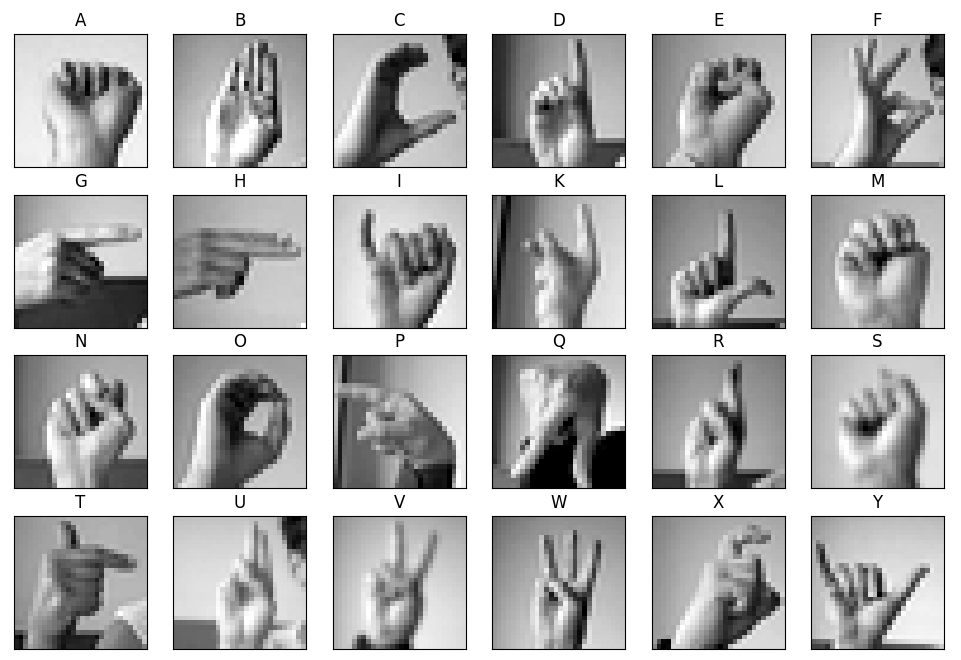




Muodosta (esimerkiksi allaolevan näköinen) konvoluutioneuroverkko kuvien luokittelemiseksi, jolla saavutetaan 99.5 %:n testitarkkuus  

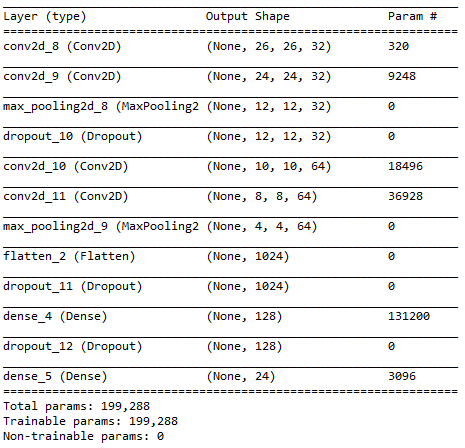

Laske verkon antamat todennäköisyydet satunnaisesti valitulle testikuvalle ja piirrä allaolevan näköinen kuva

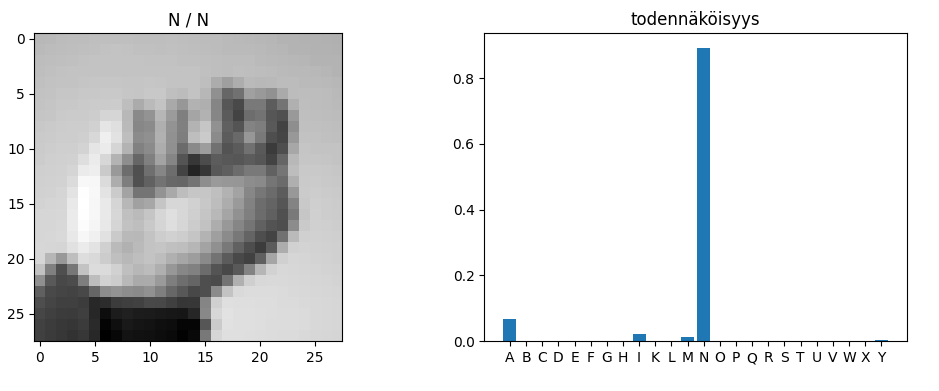

Lataa datajoukko itsellesi (tarvitset Kaggle-tilin), muodosta kansio sign_mnist jossa ovat tiedostot sign_mnist_train.csv ja sign_mnist_test.csv, zippaa se ja lataa driveesi.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pura sign_mnist.zip colabin kansioon /content
!unzip "/content/drive/My Drive/sign_mnist.zip" -d "/content"

Archive:  /content/drive/My Drive/sign_mnist.zip
   creating: /content/sign_mnist/
  inflating: /content/sign_mnist/sign_mnist_test.csv  
  inflating: /content/sign_mnist/sign_mnist_train.csv  


In [ ]:
#lue tiedostot Pandas-kirjaston dataframeiksi
import pandas as pd
train_data=pd.read_csv('/content/sign_mnist/sign_mnist_train.csv',header=0)
test_data=pd.read_csv('/content/sign_mnist/sign_mnist_test.csv',header=0)
#ja muuta ne np.arrayksi
train_data=np.array(train_data)
test_data=np.array(test_data)

In [ ]:
xtrain=train_data[:,1:]/255.0 #pikseliarvot 0...1
ytrain=train_data[:,0]
xtest=test_data[:,1:]/255.0
ytest=test_data[:,0]

#muunnetaan xtrain ja xtest 4D-arrayiksi
mtrain=xtrain.shape[0]
mtest=xtest.shape[0]
xtrain=xtrain.reshape((mtrain,28,28,1))
xtest=xtest.reshape((mtest,28,28,1))



In [ ]:
print(xtrain.shape)
print(xtest.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
#luokka y=9 puuttuu (esittää aakkosta J))
#pienennetään luokkia 10...24 yhdellä
ytrain[ytrain>9]=ytrain[ytrain>9]-1
ytest[ytest>9]=ytest[ytest>9]-1

Y=['A','B','C','D','E','F','G','H','I','K','L','M',
   'N','O','P','Q','R','S','T','U','V','W','X','Y']

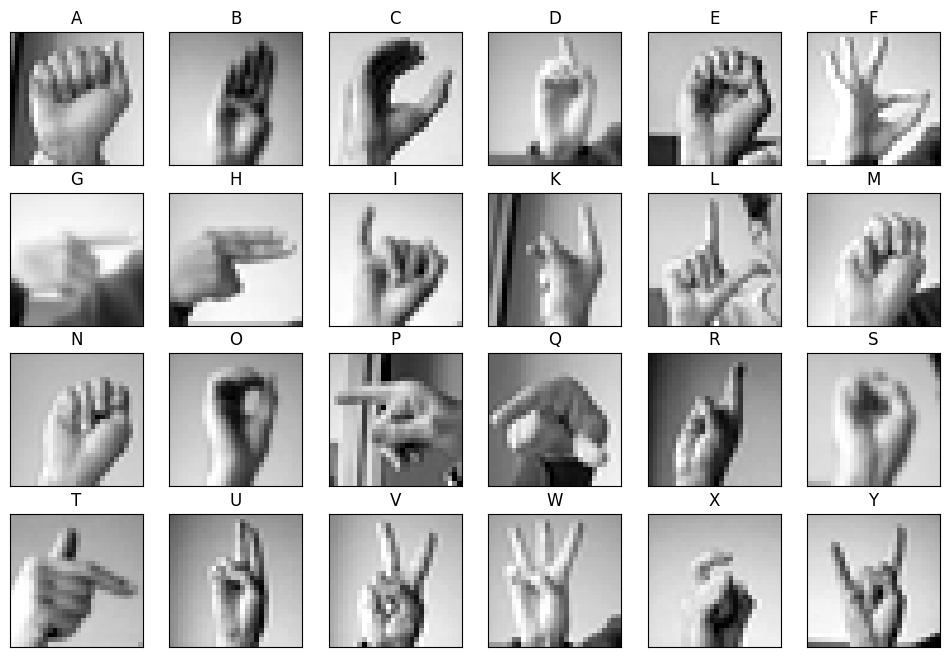

In [ ]:
#esimerkkikuvat
plt.figure(figsize=(12,8))
for k in range(24):
    xtraink=xtrain[ytrain==k]
    mk=xtraink.shape[0]
    indk=np.random.randint(mk)
    kuvak=xtraink[indk]
    plt.subplot(4,6,k+1)
    plt.imshow(kuvak, cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.title(Y[k])

## **HARJOITUS 2**

[Sign-Language-Digits-Dataset](https://github.com/ardamavi/Sign-Language-Digits-Dataset)

100x100x3 värikuvia viittomakielen numeroista 0-9, 1441 training- ja 618 testikuvaa.



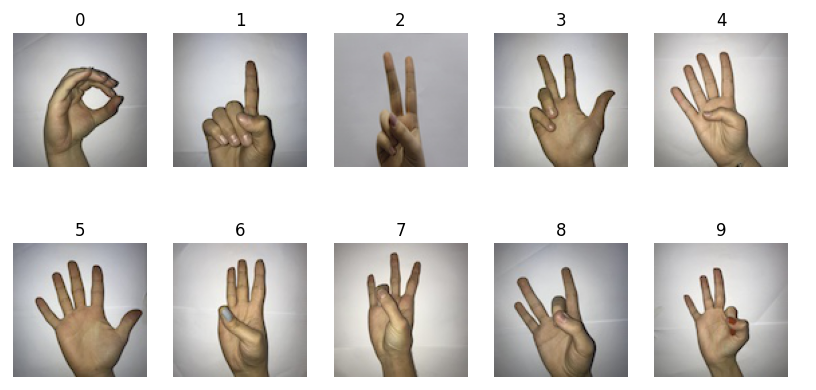

Muodosta (esimerkiksi allaolevan näköinen) konvoluutioneuroverkko kuvien luokittelemiseksi, jolla saavutetaan 99.5 %:n testitarkkuus

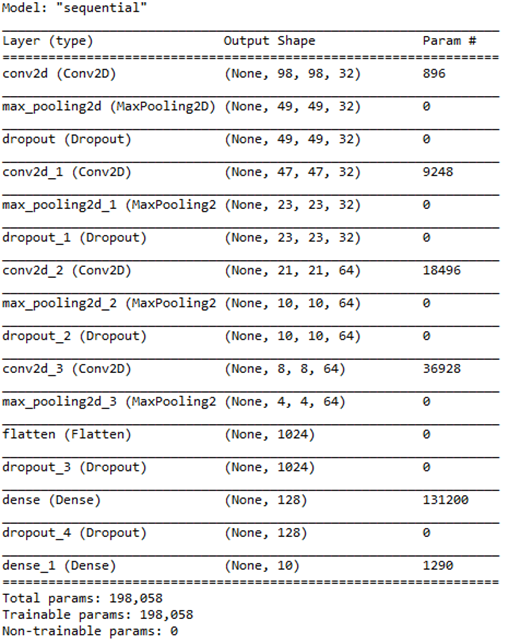

In [ ]:
#haetaan datajoukko
!git clone 'https://github.com/ardamavi/Sign-Language-Digits-Dataset.git'

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 29.33 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [ ]:
#lasketaan kuvien määrä
import os
dir='/content/Sign-Language-Digits-Dataset/Dataset'
m=0
for k in range(10):
  dirk=dir+'/'+str(k)
  filenames=os.listdir(dirk)
  m+=len(filenames)
print(m)  

2062


In [ ]:
#kerätään kuvat 4D-arrayksi X ja niiden numeroarvot 1D-arrayksi y 
X=np.zeros((m,100,100,3))
y=np.zeros(m)
corrupt=[] #lista, johon kerätään epäkelvot kuvat (joiden koko ei ole 100x100x3)
i=0 #kuvan numero
for k in range(10):
  dirk=dir+'/'+str(k)
  filenames=os.listdir(dirk)
  for filename in filenames:
    corrupt=[]
for k in range(10):
  dirk=dir+'/'+str(k)
  filenames=os.listdir(dirk)
  for filename in filenames:
    path=dirk+'/'+filename
    kuva=plt.imread(path)
    if kuva.shape==(100,100,3):
      X[i]=plt.imread(path)
      y[i]=k
      i+=1
    else:
      corrupt.append(kuva)  


In [ ]:
print(m)
print(i)
print(len(corrupt))
corrupt[0].shape

2062
2059
3


(3024, 3024, 3)

In [ ]:
#poistetaan tarpeettomat nollat
X=X[:i]
y=y[:i]
#pikseliarvot 0...1
X=X/255.0

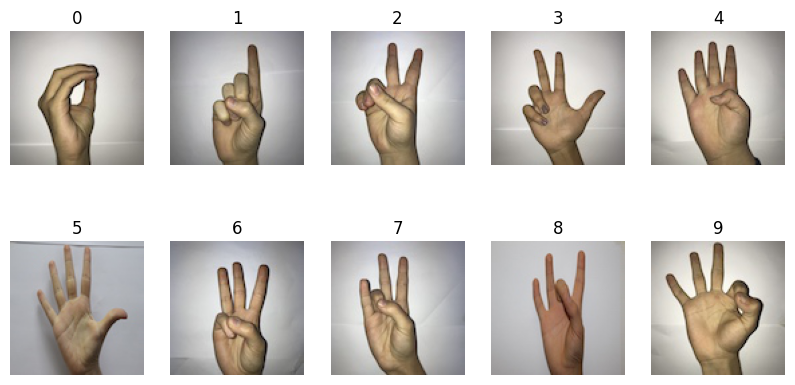

In [ ]:
#esimerkkikuvat
plt.figure(figsize=(10,5))
for k in range(10):
  Xk=X[y==k]
  plt.subplot(2,5,k+1)
  plt.imshow(Xk[0])
  plt.axis('off')
  plt.title(str(k))

In [ ]:
#jaetaan training- ja testikuviin
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,stratify=y)  
print(Xtrain.shape)
print(Xtest.shape)

(1441, 100, 100, 3)
(618, 100, 100, 3)


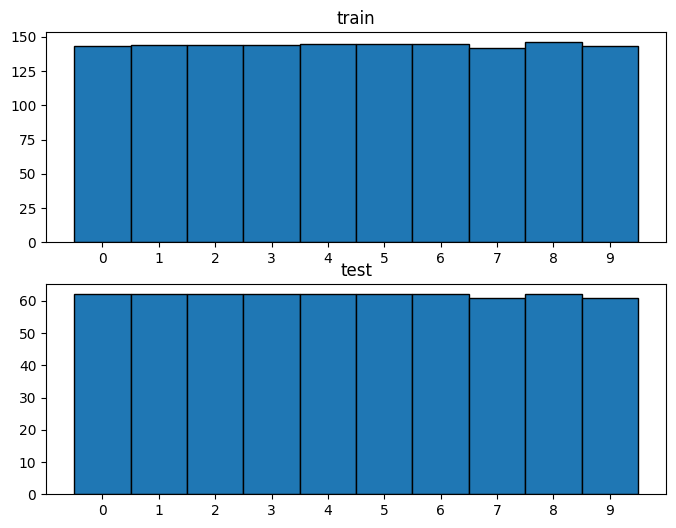

In [ ]:
#eri numeroiden jakaumat
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.hist(ytrain,bins=np.arange(-0.5,10.5,1),edgecolor='k')
plt.xticks(np.arange(0,10,1))
plt.title('train')
plt.subplot(212)
plt.hist(ytest,bins=np.arange(-0.5,10.5,1),edgecolor='k')
plt.xticks(np.arange(0,10,1))
plt.title('test')
plt.show()

##**HARJOITUS 3**

[Flowers-datajoukko](https://www.tensorflow.org/datasets/catalog/tf_flowers)

Sisältää 3670 värikuvaa lajikkeista daisy, dandelion, rose, tulip ja sunflower,
2570 training- ja 1100 testi-kuvaa.

Muodosta konvoluutioneuroverkko niiden luokittelemiseksi, jolla päästään yli 80 % testitarkkuuteen. 

Käytä kuvakokoa 150x150 ja data-augmentaatiota.

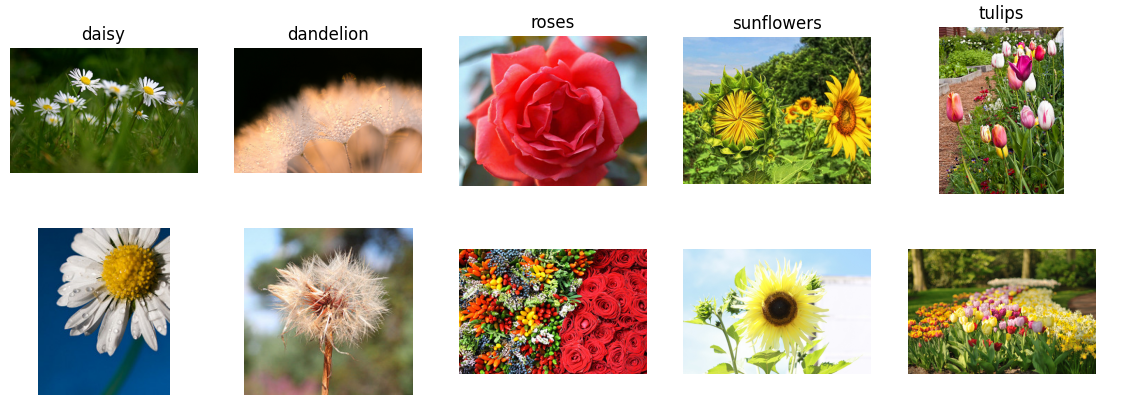

In [ ]:
import tensorflow
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_dir = tensorflow.keras.utils.get_file(origin=_URL, 
                                   fname="flower_photos.tgz", 
                                   extract=True)

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
import os
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/roses


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'flower_photos')
base_dir

'/root/.keras/datasets/flower_photos'

In [ ]:
categories = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
m=np.zeros(5) #eri luokkien kuvien määrät

for k in range(5):
  category=categories[k]
  category_dir=os.path.join(base_dir, category)
  m[k]=len(os.listdir(category_dir))


m=m.astype(int)
print(m)

[633 898 641 699 799]


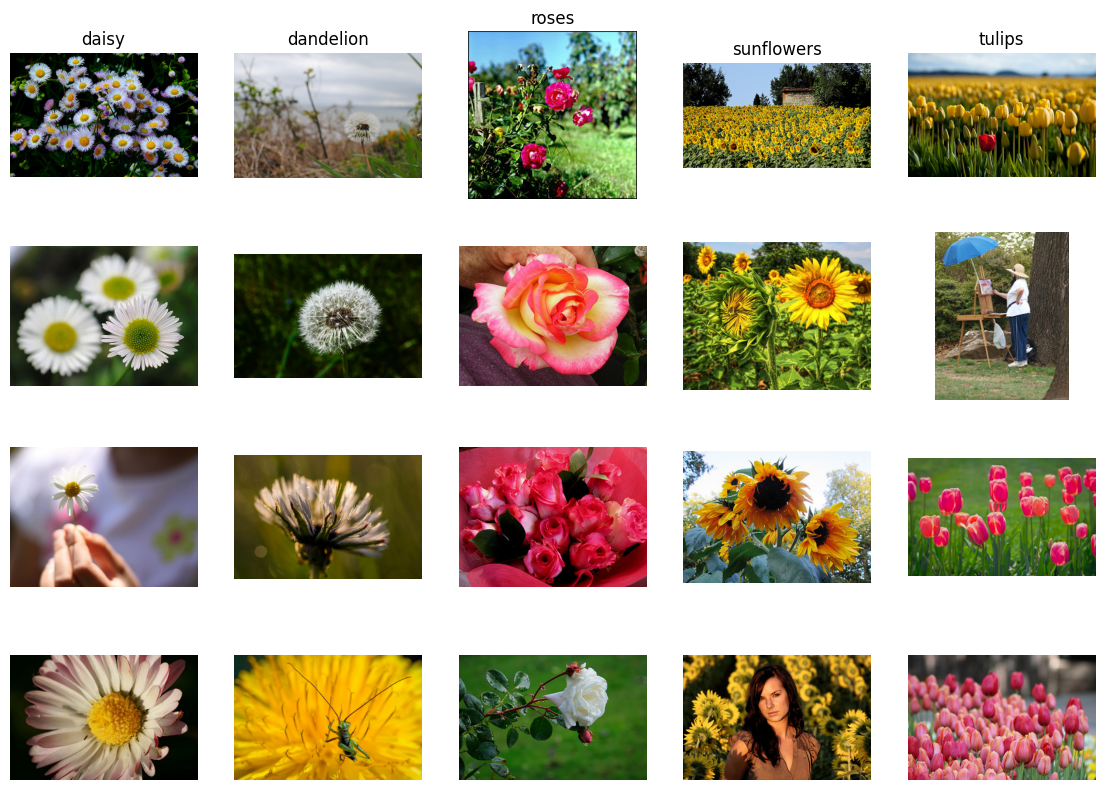

In [ ]:
plt.figure(figsize=(14,10))
for k in range(5):
  category=categories[k]
  flower_folder=os.path.join(base_dir, category)
  flower_names=os.listdir(flower_folder)
  n=np.random.randint(0,m[k],4)
  for i in range(4):
    flower_name=flower_names[n[i]]
    flower_path=os.path.join(flower_folder,flower_name) 
    kuva=plt.imread(flower_path)
    plt.subplot(4,5,1+k+i*5)
    plt.imshow(kuva)
    plt.axis('off')
    if i==0:
      plt.title(category)


In [ ]:
#luodaan train- ja test-datalle kansiot
target_dir = '/content/flowers'
os.mkdir(target_dir)

train_dir = os.path.join(target_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(target_dir, 'test')
os.mkdir(test_dir)

In [ ]:
for category in categories:
  category_train_dir=os.path.join(train_dir, category)
  os.mkdir(category_train_dir)
  category_test_dir=os.path.join(test_dir, category)
  os.mkdir(category_test_dir)

In [ ]:
print(0.7*m)

[443.1 628.6 448.7 489.3 559.3]


In [ ]:
mtrain=[443,629,449,489,560] #train-kuvien määrät, n.70 %
print(np.sum(mtrain))
print(mtrain/m)

2570
[0.69984202 0.70044543 0.70046802 0.69957082 0.7008761 ]


In [ ]:
import shutil

#jaetaan train- ja test-kuviin
for k in range(5):
  category=categories[k]
  src_dir=os.path.join(base_dir,category) 
  dst_train_dir=os.path.join(train_dir,category)
  dst_test_dir=os.path.join(test_dir,category)
  fnames=os.listdir(src_dir)
  rp=np.random.permutation(m[k])
  for n in range(m[k]):
    fname=fnames[rp[n]]
    src = os.path.join(src_dir, fname)
    if n<mtrain[k]:
        dst = os.path.join(dst_train_dir, fname)
    else:
        dst = os.path.join(dst_test_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
for category in categories:
  tr_dir=os.path.join(train_dir,category)
  tr=os.listdir(tr_dir)
  te_dir=os.path.join(test_dir,category)
  te=os.listdir(te_dir)
  print(category +': train ' + str(len(tr)) + ', test ' + str(len(te)))

daisy: train 443, test 190
dandelion: train 629, test 269
roses: train 449, test 192
sunflowers: train 489, test 210
tulips: train 560, test 239


##**HARJOITUS 4**

Muodosta yhden piilokerroksen neuroverkko harjoituksen 3 Flowers-kuvien luokittelemiseksi, jolla päästään n. 89 % testitarkkuuteen,   käyttäen kuvien koordinaatteina VGG16 konvoluutiokerrosten ulostuloja.